# Разложение в ряд Тейлора
Разложение функции в ряд Тейлора - важная и часто использующаяся операция в математике, физике и т.д. В данном ноутбуке представлена визуализация разложения в ряд Тейлора для различных функций.

$e^x = 1+x+\frac{x^2}{2!}+\frac{x^3}{3!}+...=\sum\limits_{n=0}^{\infty} \frac{x^{n}}{n!} $

$sin(x) = x-\frac{x^3}{3!}+\frac{x^5}{5!}+...=\sum\limits_{n=0}^{\infty} (-1)^n\frac{x^{2n+1}}{(2n+1)!} $

$cos(x) = 1-\frac{x^2}{2!}+\frac{x^4}{4!}+...=\sum\limits_{n=0}^{\infty} (-1)^n\frac{x^{2n}}{(2n)!} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

## Реализация "в лоб"

In [2]:
x = 0.1
y_cos = np.cos(x)
y_sin = np.sin(x)
y_exp = np.exp(x)
# Вычисление суммы
y_cos_approx = 1-x**2/np.math.factorial(2)+x**4/np.math.factorial(4)
y_sin_approx = x-x**3/np.math.factorial(3)+x**5/np.math.factorial(5)
y_exp_approx = 1+x+x**2/np.math.factorial(2)
# Относительная погрешность
rel_err_cos = abs((y_cos-y_cos_approx)/y_cos)
rel_err_sin = abs((y_sin-y_sin_approx)/y_sin)
rel_err_exp = abs((y_exp-y_exp_approx)/y_exp)
print('Относительная ошибка cos(x): %.3f%%\n\
Относительная ошибка sin(x): %.3f%%\n\
Относительная ошибка exp(x): %.3f%%' %
      (rel_err_cos*100, rel_err_sin*100, rel_err_exp*100 ))

Относительная ошибка cos(x): 0.000%
Относительная ошибка sin(x): 0.000%
Относительная ошибка exp(x): 0.015%


## Реализация с помощью функций

In [3]:
def cos_approx(x, num_terms):
    result = 0
    for n in range(num_terms):
        result += (-1)**n*x**(2*n)/np.math.factorial(2*n)
    
    return result

def exp_approx(x, num_terms):
    result = 0
    for n in range(num_terms):
        result += x**n/np.math.factorial(n)
    
    return result

In [4]:
num_terms = 2
x = np.linspace(-5, 5, 100)
y_true = np.exp(x)
y_approx = exp_approx(x, num_terms)

(<matplotlib.patches.Rectangle at 0x1df7afb32e0>,
 (<matplotlib.patches.ConnectionPatch at 0x1df7afb7f10>,
  <matplotlib.patches.ConnectionPatch at 0x1df7afb3a90>))

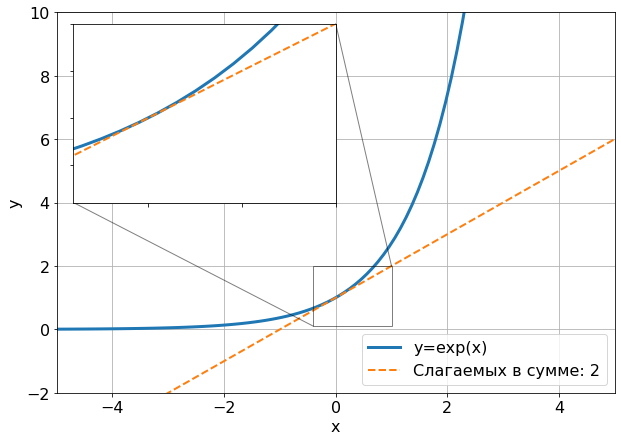

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlim([-5, 5])
ax.set_ylim([-2, 10])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
ax.plot(x, y_true, lw=3, label='y=exp(x)')
ax.plot(x, y_approx, '--', lw=2, label='Слагаемых в сумме: %d' % num_terms)
ax.legend(loc='lower right')

# Расположение внутреннего окна
axins = ax.inset_axes([0.03, 0.5, 0.47, 0.47])
axins.plot(x, y_true, lw=3, label='y=exp(x)')
axins.plot(x, y_approx, '--', lw=2, label='Слагаемых в сумме: %d' % num_terms)
# Подобласть исходного изображения
x1, x2, y1, y2 = -0.4, 1, 0.1, 2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins, edgecolor="black")

## Изобразим различные приближения

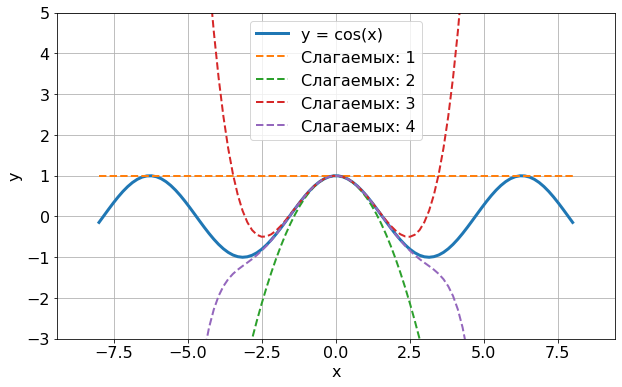

In [6]:
x = np.linspace(-8, 8, 100)
y_true = np.cos(x)
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlim([-3*np.pi, 3*np.pi])
ax1.set_ylim([-3, 5])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid()

num_terms = list(range(1, 5))
ax1.plot(x, y_true, lw=3, label='y = cos(x)')
for number in num_terms:
    y_approx = cos_approx(x, number)
    ax1.plot(x, y_approx, '--', lw=2, label='Слагаемых: %d' % number)
    
ax1.legend()